In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [76]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
from sklearn.datasets import load_digits as ld

def load_digits():
    return ld()


In [98]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
digits=load_digits()
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")
print(f"Images shape: {digits.images.shape}")
print(f"Target names: {digits.target_names}")
print(f"Classes: {len(digits.target_names)}")
print(f"Sample image:\n{digits.images[0]}")

Data shape: (1797, 64)
Target shape: (1797,)
Images shape: (1797, 8, 8)
Target names: [0 1 2 3 4 5 6 7 8 9]
Classes: 10
Sample image:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [99]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
print(f"Data shape: {digits.data.shape}")
print(f"Data contents:\n{digits.data}")

Data shape: (1797, 64)
Data contents:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [100]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_clusters:int ,random_state:int, digits):

    model=KMeans(n_clusters=n_clusters,random_state=random_state)
    clusters=model.fit_predict(digits.data)
    return (model,clusters)

model, clusters = predict(n_clusters=10, random_state=0, digits=digits)
    

c:\Users\amorgos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [101]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
print(model.cluster_centers_.shape)

(10, 64)


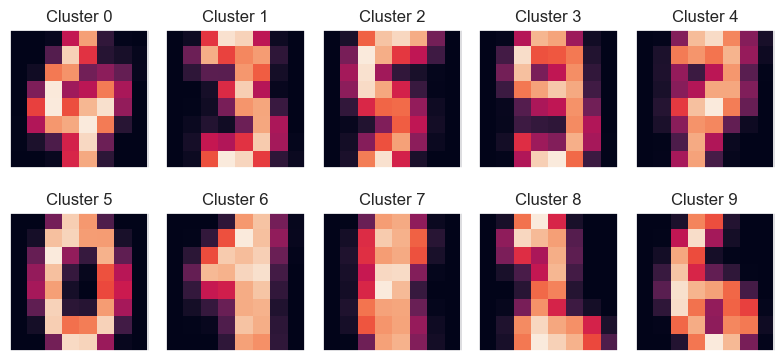

In [104]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
centroids = model.cluster_centers_

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8, 4))

# Flatten the subplot array so that we can iterate over it
axs = axs.flatten()

# Loop over each centroid and subplot, and plot the centroid as an image
for i in range(len(centroids)):
    axs[i].imshow(centroids[i].reshape(8, 8))
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Cluster {i}")

# Display the plot
plt.tight_layout()
plt.show()

In [107]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray
def get_labels(clusters:np.ndarray,digits):
    labels = np.full_like(clusters,-1)
    for label in np.unique(clusters):
        mask=(clusters==label)
        target_values = digits.target[mask]
        mode = np.bincount(target_values).argmax()
        labels[mask] = mode
    return labels
    
labels=get_labels(clusters,digits)

1797


In [109]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
def calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray):
    return accuracy_score(target_labels,predicted_labels).round(2)

accuracy=calc_accuracy(digits.target,labels)
print(accuracy)

0.79


<Axes: >

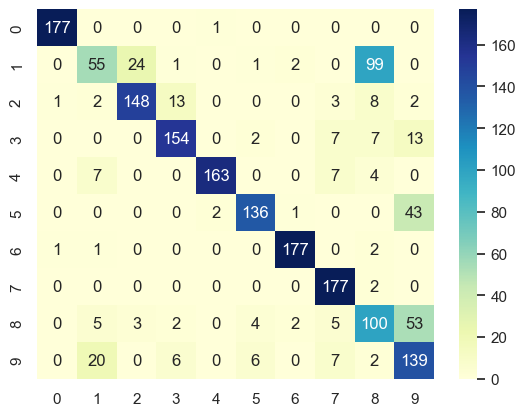

In [122]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
cm=confusion_matrix(digits.target,labels)
sns.heatmap(cm, annot=True, fmt='d',cmap='YlGnBu')